# Hidden units regions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import modules

phi_1 =  0.2
phi_2 = -0.8
phi_3 =  0.7
phi_4 =  0.4
h_1: Hidden Unit: (-0.2,  0.3)
h_2: Hidden Unit: (-0.9,  0.8)
h_3: Hidden Unit: ( 1.0, -0.6)


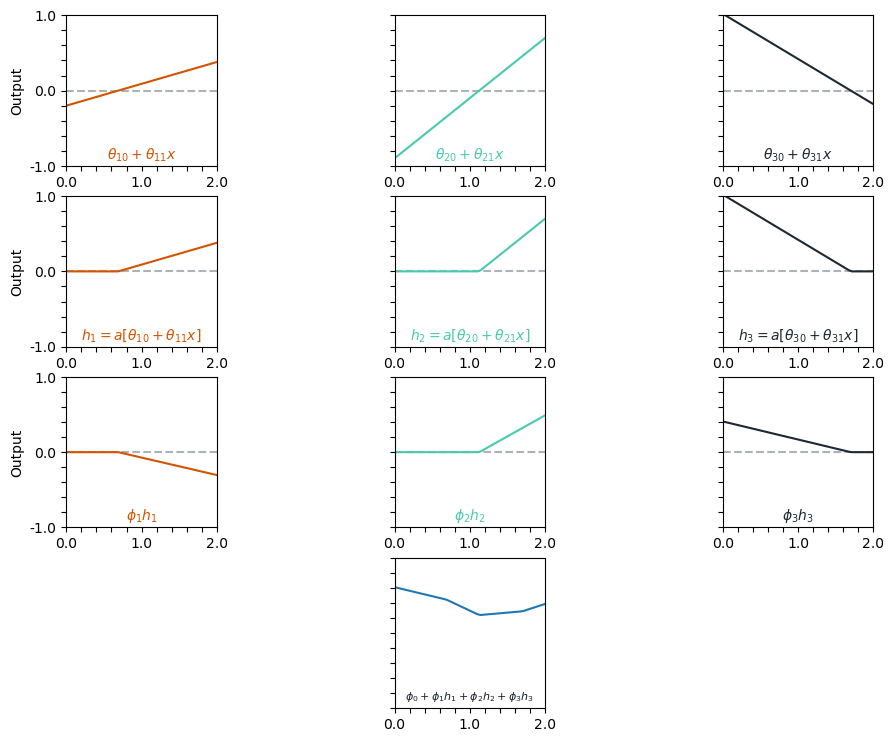

In [2]:
neural_network = modules.ShallowNeuralNetwork(params=[0.2, -0.8, 0.7, 0.4],
                                        hidden_units_params=[(-0.2, 0.29), (-0.9, 0.8), (1.02, -0.6)])

for i,p in enumerate(neural_network.params):
    print("phi_%d = %4.1f" % (i+1, p))

fig, axes = plt.subplots(4,3, figsize=(12, 9), dpi=100)

for i, (h,color) in enumerate(zip(neural_network.hidden_units, ["#d35400", "#48c9b0", "#1c2833"])):
    print(f"h_{i+1}:", h)
    titles = [rf"$\theta_{{{i+1}0}} + \theta_{{{i+1}1}} x$",
                rf"$h_{i+1} = a[\theta_{{{i+1}0}} + \theta_{{{i+1}1}} x]$",
                rf"$\phi_{i+1} h_{i+1}$"]
    modules.hidden_unit_linear_regions(h, phi=neural_network.params[i+1],
                                axes=[axes[0,i], axes[1,i], axes[2,i]],
                                titles=titles,
                                color=color)
for i,ax in enumerate(axes.ravel()):
    ax.set_aspect('equal')
    ax.set_xlim([0, 2])
    ax.set_ylim([-1, 1])
    ax.set_xticks(ticks=np.arange(0,2.2,0.2), labels=["0.0"]+['']*4+["1.0"]+['']*4+["2.0"])
    if i%3==0:
        ax.set_yticks(ticks=np.arange(-1,1.2,0.2), labels=["-1.0"]+['']*4+["0.0"]+['']*4+["1.0"])
    else:
        ax.set_yticks(ticks=np.arange(-1,1.2,0.2), labels=['']*11)
    if i%3==0: ax.set_ylabel("Output")

axes[3,0].axis("off")
axes[3,2].axis("off")

t = np.linspace(0,2,50)
axes[3,1].plot(t, [neural_network(x) for x in t])
axes[3,1].text(1., -0.85, r"$\phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3$", horizontalalignment='center',
            verticalalignment='center', color="#17202a", fontsize=8)

plt.show()

# Linear model

In [3]:
import torch

import trainer

## From scratch implementation

In [4]:
data = modules.LinearDataset(w=torch.tensor([1.3, 0.6]),
                        b=torch.tensor([4.9]), n=1000, noise=0.01)
dataloader = torch.utils.data.DataLoader(dataset=data, shuffle=True, batch_size=16, num_workers=4)
print("num of batches: ", len(dataloader))
model = modules.FromScratchLinearModel(num_inputs=2)
optimizer = trainer.SGD(params=[model.w, model.b], lr=0.01)
criterion = lambda x,y: ((x-y)**2 / 2).mean()

print("Params to estimate are:")
print("w:", dataloader.dataset.w, ", b:", dataloader.dataset.b)
print("Before training:")
print("w:", model.w.detach().numpy(), ", b:", model.b.item())
trainer.train_model(model=model, data=dataloader, criterion=criterion, optimizer=optimizer, epochs=10)
print("After training")
print("w:", model.w.detach().numpy(), ", b:", model.b.item())

num of batches:  63
Params to estimate are:
w: tensor([1.3000, 0.6000]) , b: tensor([4.9000])
Before training:
w: [[0.00715057]
 [0.00094521]] , b: 0.0
Epoch: 1, loss: 7.5150
Epoch: 2, loss: 2.0779
Epoch: 3, loss: 0.5779
Epoch: 4, loss: 0.1608
Epoch: 5, loss: 0.0448
Epoch: 6, loss: 0.0124
Epoch: 7, loss: 0.0035
Epoch: 8, loss: 0.0010
Epoch: 9, loss: 0.0003
Epoch: 10, loss: 0.0001
After training
w: [[1.2986851 ]
 [0.59909743]] , b: 4.891310214996338


## Concise implementation

In [5]:
import torch.nn as nn

In [6]:
model = modules.ConciseLinearModel(input_size=2, output_size=1, init=False)
print("Bias:", model.net.bias)
print("Weight:", model.net.weight)
model.net.bias.data.fill_(0)
model.net.weight.data.normal_(mean=0, std=1)
print("Bias:", model.net.bias)
print("Weight:", model.net.weight)

Bias: Parameter containing:
tensor([0.0050], requires_grad=True)
Weight: Parameter containing:
tensor([[0.3285, 0.6433]], requires_grad=True)
Bias: Parameter containing:
tensor([0.], requires_grad=True)
Weight: Parameter containing:
tensor([[1.4502, 0.1705]], requires_grad=True)


Params to estimate are:
w: tensor([ 2.3000, -2.3000]) , b: tensor([-8])
Before training:
w: [[ 1.5337808 -0.6707281]] , b: 0.0
Epoch: 1, loss: 24.7699
Epoch: 2, loss: 2.0220
Epoch: 3, loss: 0.1661
Epoch: 4, loss: 0.0137
Epoch: 5, loss: 0.0012
Epoch: 6, loss: 0.0002
Epoch: 7, loss: 0.0001
Epoch: 8, loss: 0.0001
Epoch: 9, loss: 0.0001
Epoch: 10, loss: 0.0001


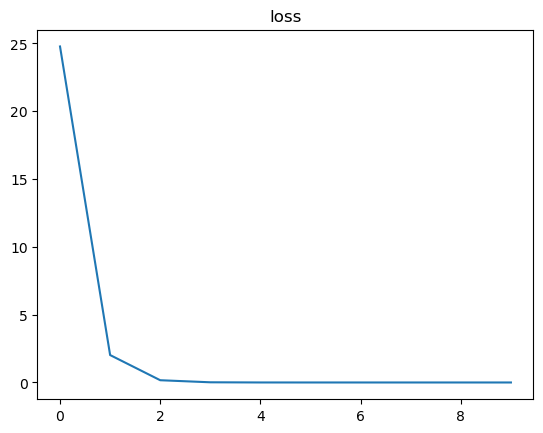

After training
w: [[ 2.2995214 -2.299937 ]] , b: -7.999031066894531


In [7]:
data = modules.LinearDataset(w=torch.tensor([2.3, -2.3]),
                        b=torch.tensor([-8]), n=1000, noise=0.01)
dataloader = torch.utils.data.DataLoader(dataset=data, shuffle=True, batch_size=16, num_workers=4)
model = modules.ConciseLinearModel(input_size=2, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
print("Params to estimate are:")
print("w:", dataloader.dataset.w, ", b:", dataloader.dataset.b)
print("Before training:")
print("w:", model.net.weight.data.detach().numpy(), ", b:", model.net.bias.data.item())
trainer.train2(model=model, data=dataloader, criterion=criterion, optimizer=optimizer, epochs=10)
print("After training")
print("w:", model.net.weight.data.detach().numpy(), ", b:", model.net.bias.data.item())

# Classification

In [8]:
data = modules.FashionMnist(batch_size=4).train
print(len(data))
print(data.dataset)
print(len(data.dataset))

100%|██████████| 26.4M/26.4M [00:00<00:00, 35.2MB/s]


Extracting datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to datasets/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 314kB/s]


Extracting datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to datasets/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 19.6MB/s]


Extracting datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to datasets/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 24.2MB/s]

Extracting datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to datasets/FashionMNIST/raw

15000
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
60000


tensor(6)
tensor(0)
tensor(4)
tensor(8)


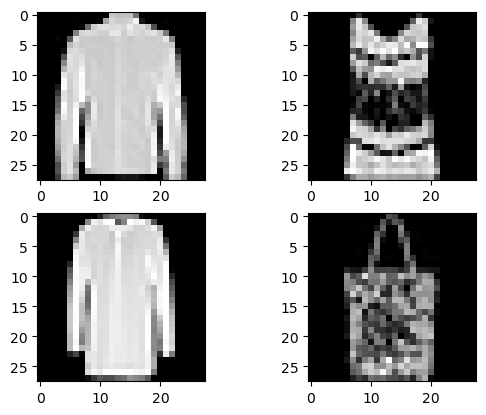

In [9]:
fig, axes = plt.subplots(2,2)
axes = axes.ravel()
for batch in data:
    imgs, labels = batch
    for i,img in enumerate(imgs):
        print(labels[i])
        axes[i].imshow(img.reshape(28,28), cmap="gray")
    break
plt.show()

## From scratch implementation

In [10]:
modules.accuracy(torch.tensor([[0.9,0.1,0.1], [0.1,0.9,0.1], [0.9,0.1,0.1]]), torch.tensor([0,1,0]))

tensor(1.)

In [11]:
x = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
print(x)
x.sum(axis=0, keepdims=True), x.sum(axis=1, keepdims=True)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [12]:
x = torch.rand((2,5))
print(x)
probs = modules.softmax(x)
probs, probs.sum(axis=1)

tensor([[6.9026e-01, 3.5178e-01, 8.3412e-01, 4.7222e-01, 4.5796e-01],
        [5.3525e-05, 2.1453e-01, 2.4874e-02, 2.0732e-01, 9.0820e-02]])


(tensor([[0.2240, 0.1597, 0.2587, 0.1801, 0.1776],
         [0.1789, 0.2217, 0.1834, 0.2201, 0.1959]]),
 tensor([1., 1.]))

In [13]:
model = modules.SoftmaxRegressionScratch(num_inputs=28*28, num_outputs=10)
for batch in data:
    y_pred = model(*batch[:-1])
    print(y_pred)
    break

tensor([[0.1050, 0.1002, 0.0913, 0.1246, 0.1055, 0.0827, 0.0807, 0.1165, 0.1052,
         0.0882],
        [0.0974, 0.1196, 0.0859, 0.1304, 0.0987, 0.0916, 0.0827, 0.1138, 0.0964,
         0.0835],
        [0.0962, 0.1151, 0.0994, 0.1180, 0.1061, 0.0896, 0.0877, 0.0946, 0.0987,
         0.0945],
        [0.1115, 0.0955, 0.1018, 0.0928, 0.1059, 0.0949, 0.1032, 0.0980, 0.1073,
         0.0891]], grad_fn=<DivBackward0>)


In [14]:
y_true = torch.tensor([0,2, 1])
y_pred = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5], [0.3, 0.2, 0.5]])
y_pred[[0,1,2], y_true]

tensor([0.1000, 0.5000, 0.2000])

In [15]:
def cross_entropy(y_pred, y_true):
    return -torch.log(y_pred[list(range(len(y_true))), y_true]).mean()

In [16]:
cross_entropy(y_pred,y_true)

tensor(1.5351)

In [18]:
model = modules.SoftmaxRegressionScratch(num_inputs=28*28, num_outputs=10)
dataloader = modules.FashionMnist(batch_size=256).train
criterion = cross_entropy
epochs=10
optimizer = trainer.SGD(model.parameters(), 0.1)
trainer.train_model(model=model, data=dataloader, criterion=criterion, optimizer=optimizer, epochs=10, metrics=[modules.accuracy])


Epoch: 1, loss: 0.7851, accuracy: 0.7502
Epoch: 2, loss: 0.5705, accuracy: 0.8119
Epoch: 3, loss: 0.5250, accuracy: 0.8260
Epoch: 4, loss: 0.5009, accuracy: 0.8318
Epoch: 5, loss: 0.4861, accuracy: 0.8371
Epoch: 6, loss: 0.4739, accuracy: 0.8410
Epoch: 7, loss: 0.4649, accuracy: 0.8430
Epoch: 8, loss: 0.4585, accuracy: 0.8446
Epoch: 9, loss: 0.4516, accuracy: 0.8471
Epoch: 10, loss: 0.4474, accuracy: 0.8485


## Concise classification model

In [19]:
import torch.nn.functional as F
y_true = torch.tensor([0,2, 1], dtype=torch.int64)
y_pred = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5], [0.3, 0.2, 0.5]])
y_pred[[0,1,2], y_true]
F.cross_entropy(input=y_pred, target=y_true,
                reduction="mean")

tensor(1.1776)

Epoch: 1, loss: 0.7840, accuracy: 0.7494
Epoch: 2, loss: 0.5720, accuracy: 0.8121
Epoch: 3, loss: 0.5258, accuracy: 0.8257
Epoch: 4, loss: 0.5021, accuracy: 0.8325
Epoch: 5, loss: 0.4848, accuracy: 0.8375
Epoch: 6, loss: 0.4744, accuracy: 0.8405
Epoch: 7, loss: 0.4657, accuracy: 0.8416
Epoch: 8, loss: 0.4591, accuracy: 0.8447
Epoch: 9, loss: 0.4524, accuracy: 0.8471
Epoch: 10, loss: 0.4477, accuracy: 0.8486


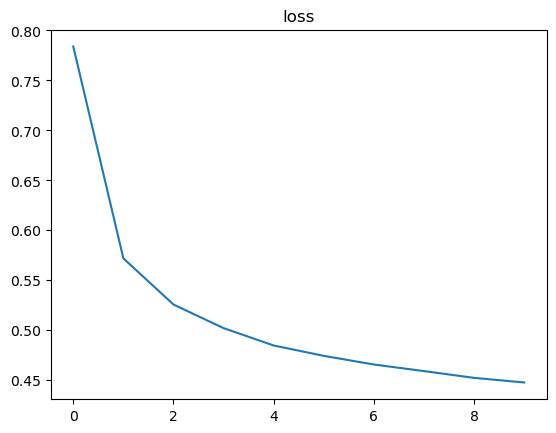

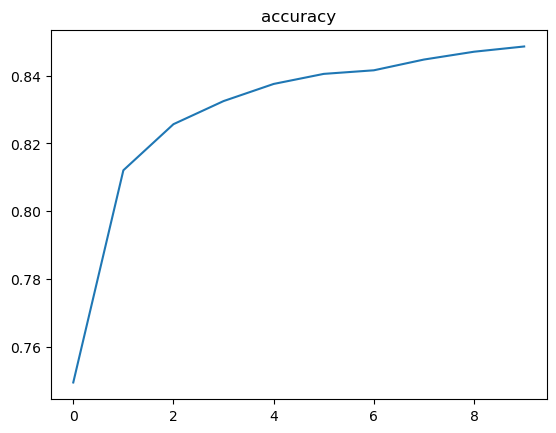

In [20]:
model = modules.ConciseSoftmaxRegression(num_inputs=28*28, num_outputs=10)
dataloader = modules.FashionMnist(batch_size=256).train
criterion = F.cross_entropy
epochs=10
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
trainer.train2(model=model, data=dataloader, criterion=criterion, optimizer=optimizer, epochs=10, metrics=[modules.accuracy])

# Multilayer Perceptrons (MLPs)

## From scratch implementation

In [21]:
model = modules.MLPScratch(num_inputs=28*28, num_outputs=10, num_hiddens=256)
dataloader = modules.FashionMnist(batch_size=256).train
# criterion = cross_entropy
criterion = F.cross_entropy
epochs=10
optimizer = trainer.SGD(model.parameters(), 0.01)
trainer.train_model(model=model, data=dataloader, criterion=criterion, optimizer=optimizer, epochs=10, metrics=[modules.accuracy])


Epoch: 1, loss: 2.1563, accuracy: 0.4044
Epoch: 2, loss: 1.5304, accuracy: 0.5627
Epoch: 3, loss: 1.1248, accuracy: 0.6383
Epoch: 4, loss: 0.9399, accuracy: 0.6657
Epoch: 5, loss: 0.8429, accuracy: 0.6874
Epoch: 6, loss: 0.7832, accuracy: 0.7085
Epoch: 7, loss: 0.7399, accuracy: 0.7313
Epoch: 8, loss: 0.7053, accuracy: 0.7490
Epoch: 9, loss: 0.6756, accuracy: 0.7637
Epoch: 10, loss: 0.6494, accuracy: 0.7758


## Concise implementation

ConciseMLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=10, bias=True)
  )
)
Epoch: 1, loss: 0.8638, accuracy: 0.7161
Epoch: 2, loss: 0.5539, accuracy: 0.8069
Epoch: 3, loss: 0.4967, accuracy: 0.8268
Epoch: 4, loss: 0.4629, accuracy: 0.8379
Epoch: 5, loss: 0.4394, accuracy: 0.8457
Epoch: 6, loss: 0.4210, accuracy: 0.8510
Epoch: 7, loss: 0.4043, accuracy: 0.8571
Epoch: 8, loss: 0.3913, accuracy: 0.8609
Epoch: 9, loss: 0.3809, accuracy: 0.8652
Epoch: 10, loss: 0.3727, accuracy: 0.8683


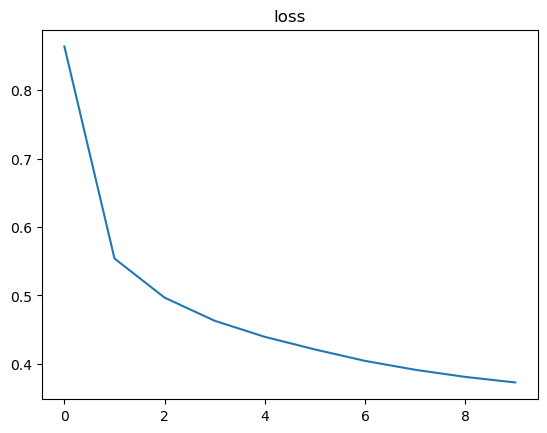

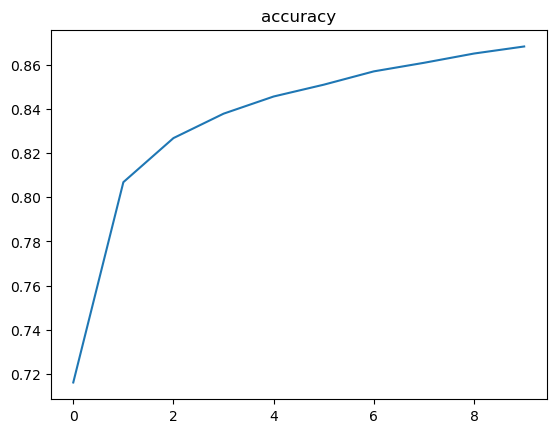

In [22]:
model = modules.ConciseMLP(num_inputs=28*28, num_outputs=10, num_hiddens=256)
print(model)
dataloader = modules.FashionMnist(batch_size=256).train
criterion = F.cross_entropy
epochs=10
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
trainer.train2(model=model, data=dataloader, criterion=criterion, optimizer=optimizer, epochs=10, metrics=[modules.accuracy])